# Wild Animals Characterstics Analysis

This is my first Exploratory Data Analysis project. I have taken a dataset of animals from kaggle. The dataset is of the type csv. Unfortunately I am unable to find the url of the dataset on kaggle at the moment. The dataset contains information about the scientific information of those animals, their top speed, life span, weight etc.

Importing the jovian library to be able to save this notebook on my Jovian account.

In [ ]:
pip install jovian --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shourya242/wild-animals-characterstics-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shourya242/wild-animals-characterstics-analysis


'https://jovian.com/shourya242/wild-animals-characterstics-analysis'

Importing the necessary libraries for analysis of the data. We need the libraries numpy for numerical computation, pandas to import the dataset as a dataframe. We also import the Matplolib and Seaborn libraries which will help in visualisation of the data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl

Importing the dataset stored locally on my laptop. It contains a single file which contains data as csv. This is the data about different attributes of animals and their scientific information

In [ ]:
animals_df = pd.read_csv('animals_info.csv')

Let's have a look at the raw data that we have. We find that the data has 29357 rows and 22 columns.

In [ ]:
animals_df

,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,...,75 km/h,16-60 kg,80-85 cm,105-160 cm,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,...,96 km/h,65-306 kg,NaN,200-390 cm,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,...,56 km/h,100-635 kg,70-153 cm,1.4-2.8 m,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,...,20 km/h,100-160 t,NaN,25-30 m,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,...,45 km/h,3-6 t,NaN,6-9 m,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29352,Sulphur-bearded reedhaunter,Animalia,Chordata,NaN,Aves,Passeriformes,NaN,Furnariidae,Cranioleuca,Limnoctites sulphuriferus,...,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29353,Jackson's pipit,African pipit,NaN,NaN,Animalia,Chordata,NaN,Aves,Passeriformes,Motacillidae,...,NaN,NaN,NaN,NaN,starts with,"{'Geography': {'Countries': ''}, 'Biome': [], ...",{},NaN,{},{}
29354,Gabon forest robin,Forest robin,NaN,NaN,Animalia,Chordata,NaN,Aves,Passeriformes,Muscicapidae,...,NaN,NaN,NaN,NaN,starts with,"{'Geography': {'Countries': ''}, 'Biome': [], ...",{},NaN,{},{}
29355,McConnell's spinetail,Animalia,Chordata,NaN,Aves,Passeriformes,NaN,Furnariidae,Synallaxis,Synallaxis macconnelli,...,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Stable', 'Population sta..."


# DATA PRE-PROCESSING AND CLEANING

A lot of columns of this data are just about the scientific hierarchy of the animal in the nomenclature. I start by removing some of these columns like species name, suborder since this scientific nomenclature will have no effect on the statistical part of this data.

We start preprocessing and cleaning by checking the unique values in the column Kingdom.

In [ ]:
animals_df.Kingdom.unique()

array(['Animalia', "Przewalski's Horse", 'Wild Goat', 'African Wild Ass',
       'Tiger', 'European Polecat', 'Brown Bear', 'Lion', 'Raccoon Dog',
       'Wild Boar', 'Cougar', 'White Rhinoceros', 'Leopard', 'Grey Wolf',
       'Highland Cattle', 'Plains Zebra', 'Brown Rat', 'Eastern Gorilla',
       'Western Gorilla', 'Asian Elephant', 'American Black Bear',
       'Cheetah', 'Wildcat', 'Spanish Ibex', 'Giant Panda', 'Moose',
       'Black Rhinoceros', 'Mule Deer', 'American Bison', 'Giraffe',
       'House Mouse', 'Spotted Hyena', 'Elk', 'White-Tailed Deer',
       'Bighorn Sheep', 'African Bush Elephant', 'Onager', 'Reindeer',
       'Leopard Cat', 'African wildcat', 'Bontebok', 'Asiatic Black Bear',
       'Ringed Seal', 'Argali', "Humboldt's squirrel monkey",
       'Fallow Deer', 'Blue Whale', 'Red Fox', 'Sumatran Rhinoceros',
       'Polar Bear', 'European Otter', 'Hartebeest', 'African Buffalo',
       'Domestic Sheep', 'Markhor', 'Red Deer', 'Eurasian Lynx',
       'African Wi

Now we drop the column Species because it provides scientific name for all the animals. Since we already have the column "Name", having another column about the scientific name is not of much use in terms of numerical or visual analysis of the data.

In [ ]:
animals_df.drop('Species', axis=1, inplace=True)

We proceed to remove more columns of the dataset because all columns from Kingdom to Species are just about the taxonomical hierarchy of the animals and nomenclature which are not very important for our project. Hence we remove the columns Subphyllum, Suborder, and Kingdom

In [ ]:
animals_df.drop(['Subphylum', 'Suborder', 'Kingdom'], axis=1, inplace=True)

Now after removing these 4 columns, we have another look at the data.

In [ ]:
animals_df

,Name,Phylum,Class,Order,Family,Genus,Population size,Life span,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Chordata,Mammalia,Carnivora,Canidae,Canis,"400,000",10-20 yrs,75 km/h,16-60 kg,80-85 cm,105-160 cm,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
1,Tiger,Chordata,Mammalia,Carnivora,Felidae,Panthera,"2,154-3,159",10-15 yrs,96 km/h,65-306 kg,NaN,200-390 cm,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
2,Brown Bear,Chordata,Mammalia,Carnivora,Ursidae,Ursus,"200,000",20-50 yrs,56 km/h,100-635 kg,70-153 cm,1.4-2.8 m,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
3,Blue Whale,Chordata,Mammalia,Artiodactyla,Balaenopteridae,Balaenoptera,10-25 Thou,80-90 yrs,20 km/h,100-160 t,NaN,25-30 m,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
4,Killer Whale,Chordata,Mammalia,Artiodactyla,Delphinidae,Orcinus,"50,000",30-100 yrs,45 km/h,3-6 t,NaN,6-9 m,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29352,Sulphur-bearded reedhaunter,Chordata,Aves,Passeriformes,Furnariidae,Cranioleuca,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29353,Jackson's pipit,NaN,Animalia,Chordata,Aves,Passeriformes,NaN,NaN,NaN,NaN,NaN,NaN,starts with,"{'Geography': {'Countries': ''}, 'Biome': [], ...",{},NaN,{},{}
29354,Gabon forest robin,NaN,Animalia,Chordata,Aves,Passeriformes,NaN,NaN,NaN,NaN,NaN,NaN,starts with,"{'Geography': {'Countries': ''}, 'Biome': [], ...",{},NaN,{},{}
29355,McConnell's spinetail,Chordata,Aves,Passeriformes,Furnariidae,Synallaxis,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Stable', 'Population sta..."


We have a look at the columns remaining in the dataset using the df.info() function. We also get to know about the number of non-null values they have and their data type

In [ ]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29357 entries, 0 to 29356
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             29357 non-null  object
 1   Phylum           28525 non-null  object
 2   Class            29357 non-null  object
 3   Order            28920 non-null  object
 4   Family           29354 non-null  object
 5   Genus            29351 non-null  object
 6   Population size  1806 non-null   object
 7   Life span        1862 non-null   object
 8   Top speed        595 non-null    object
 9   Weight           2873 non-null   object
 10  Height           336 non-null    object
 11  Length           2947 non-null   object
 12  Attributes       29357 non-null  object
 13  Distribution     29357 non-null  object
 14  Habits           29357 non-null  object
 15  Diet             2644 non-null   object
 16  Mating_Habits    29357 non-null  object
 17  Population       29357 non-null

Now we we have a brief view of the data in all of the columns. We find that columns like Life Span, Length etc which should have numerical values have string values.

In [ ]:
animals_df.describe()

,Name,Phylum,Class,Order,Family,Genus,Population size,Life span,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
count,29357,28525,29357,28920,29354,29351,1806,1862,595,2873,336,2947,29357,29357,29357,2644,29357,29357
unique,29357,2,12,123,858,6194,652,606,138,2255,254,2122,3133,8441,2179,308,2713,41
top,Grey Wolf,Chordata,Aves,Passeriformes,Muridae,Conus,Unknown,20 yrs,40 km/h,1-2 kg,1 m,30 cm,"Terrestrial,Not a migrant,starts with","{'Geography': {'Countries': ''}, 'Biome': [], ...",{},Carnivore,{},"{'Population trend': 'Stable', 'Population sta..."
freq,1,23659,10114,5863,764,535,946,59,48,14,6,11,8463,3329,18667,365,26268,6901


Now we check the unique values in the column Phyllum. We find that the column has 2 non-null unique values.

In [ ]:
animals_df.Phylum.unique()

array(['Chordata', nan, 'Mollusca'], dtype=object)

Since there are a few na values in the dataset, we remove the rows where the value in column Phyllum is na

In [ ]:
animals_df.dropna(subset=['Phylum'], inplace=True)

Viewing the dataset again.

In [ ]:
animals_df

,Name,Phylum,Class,Order,Family,Genus,Population size,Life span,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Chordata,Mammalia,Carnivora,Canidae,Canis,"400,000",10-20 yrs,75 km/h,16-60 kg,80-85 cm,105-160 cm,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
1,Tiger,Chordata,Mammalia,Carnivora,Felidae,Panthera,"2,154-3,159",10-15 yrs,96 km/h,65-306 kg,NaN,200-390 cm,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
2,Brown Bear,Chordata,Mammalia,Carnivora,Ursidae,Ursus,"200,000",20-50 yrs,56 km/h,100-635 kg,70-153 cm,1.4-2.8 m,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
3,Blue Whale,Chordata,Mammalia,Artiodactyla,Balaenopteridae,Balaenoptera,10-25 Thou,80-90 yrs,20 km/h,100-160 t,NaN,25-30 m,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
4,Killer Whale,Chordata,Mammalia,Artiodactyla,Delphinidae,Orcinus,"50,000",30-100 yrs,45 km/h,3-6 t,NaN,6-9 m,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29350,Córdoba cinclodes,Chordata,Aves,Passeriformes,Furnariidae,Cinclodes,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29351,Western hemispingus,Chordata,Aves,Passeriformes,Thraupidae,Sphenopsis,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Stable', 'Population sta..."
29352,Sulphur-bearded reedhaunter,Chordata,Aves,Passeriformes,Furnariidae,Cranioleuca,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29355,McConnell's spinetail,Chordata,Aves,Passeriformes,Furnariidae,Synallaxis,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Stable', 'Population sta..."


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shourya242/wild-animals-characterstics-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shourya242/wild-animals-characterstics-analysis


'https://jovian.com/shourya242/wild-animals-characterstics-analysis'

Now we create a function to take string data about the attributes of animals like length, weight etc and convert them into integer values using regex to find such strings in the columns and convert them to integer. In cases where a range of numbers was given, I took the mean of the values

In [ ]:
import re
def removestr(data):
    pattern = r'[0-9]+'
    if type(data) == str:
        if data.find('-'):
            list = re.findall(pattern, data)
            new_list = []
            for nums in list:
                nums = int(nums)
                new_list.append(nums)
            sum = 0
            for nums in new_list:
                sum += nums
            num = sum/len(list)
            return num
        else:
            num = re.search(pattern, data)
            num = int(num)
            return num
    else:
        return data

Now I apply this function to the columns Life span, Weight, Length, Height and Top speed to convert the values in these rows to numerical values which can be used for analysis and visualisation.

In [ ]:
animals_df['Life span'] = animals_df['Life span'].apply(removestr)

In [ ]:
animals_df['Weight'] = animals_df['Weight'].apply(removestr)

In [ ]:
animals_df['Length'] = animals_df['Length'].apply(removestr)

In [ ]:
animals_df['Height'] = animals_df['Height'].apply(removestr)

In [ ]:
animals_df['Top speed'] = animals_df['Top speed'].apply(removestr)

Let's have another look at the data after conversion of the values. We now have a single numeric value in the columns as compared to the string ranges that we had earlier.

In [ ]:
animals_df

,Name,Phylum,Class,Order,Family,Genus,Population size,Life span,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Chordata,Mammalia,Carnivora,Canidae,Canis,"400,000",15.0,75.0,38.0,82.5,132.50,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
1,Tiger,Chordata,Mammalia,Carnivora,Felidae,Panthera,"2,154-3,159",12.5,96.0,185.5,NaN,295.00,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
2,Brown Bear,Chordata,Mammalia,Carnivora,Ursidae,Ursus,"200,000",35.0,56.0,367.5,111.5,3.75,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
3,Blue Whale,Chordata,Mammalia,Artiodactyla,Balaenopteridae,Balaenoptera,10-25 Thou,85.0,20.0,130.0,NaN,27.50,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
4,Killer Whale,Chordata,Mammalia,Artiodactyla,Delphinidae,Orcinus,"50,000",65.0,45.0,4.5,NaN,7.50,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29350,Córdoba cinclodes,Chordata,Aves,Passeriformes,Furnariidae,Cinclodes,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29351,Western hemispingus,Chordata,Aves,Passeriformes,Thraupidae,Sphenopsis,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Stable', 'Population sta..."
29352,Sulphur-bearded reedhaunter,Chordata,Aves,Passeriformes,Furnariidae,Cranioleuca,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29355,McConnell's spinetail,Chordata,Aves,Passeriformes,Furnariidae,Synallaxis,NaN,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Stable', 'Population sta..."


Now after converting this data, we take a look at all the numerical data and the columns remaining in the dataset.

In [ ]:
animals_df.describe()

,Life span,Top speed,Weight,Height,Length
count,1837.000000,581.000000,2844.000000,323.000000,2924.000000
mean,18.436536,47.759897,271.524818,71.924923,98.438697
std,15.823554,33.318235,3246.501702,66.333268,152.850199
min,1.000000,2.500000,0.000000,1.000000,1.000000
25%,8.500000,28.000000,8.000000,34.000000,19.000000
50%,15.000000,45.000000,38.500000,67.500000,50.500000
75%,22.500000,64.000000,195.875000,92.500000,112.500000
max,162.500000,389.000000,164000.000000,575.000000,3250.000000


We also have another look at brief information about data in the various columns using the .info function. We now see that the data type of the columns we applied the function on have been converted to float.

In [ ]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28525 entries, 0 to 29356
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             28525 non-null  object 
 1   Phylum           28525 non-null  object 
 2   Class            28525 non-null  object 
 3   Order            28089 non-null  object 
 4   Family           28522 non-null  object 
 5   Genus            28519 non-null  object 
 6   Population size  1784 non-null   object 
 7   Life span        1837 non-null   float64
 8   Top speed        581 non-null    float64
 9   Weight           2844 non-null   float64
 10  Height           323 non-null    float64
 11  Length           2924 non-null   float64
 12  Attributes       28525 non-null  object 
 13  Distribution     28525 non-null  object 
 14  Habits           28525 non-null  object 
 15  Diet             2607 non-null   object 
 16  Mating_Habits    28525 non-null  object 
 17  Population  

Let's now take a look at the unique values in the column Population size.

In [ ]:
animals_df['Population size'].unique()

array(['400,000', '2,154-3,159', '200,000', '10-25 Thou', '50,000',
       '1,800', '20,000', '300,000', 'below 50,000', '7,850-17,150',
       '15,000', 'Unknown', '22-31 Thou', '6,674', nan, '80,000',
       '125-148 Thou', '16-20 Thou', '3.5 mln', '7,500', '11,248-13,12',
       '29,5-50 Thou', '2,710-3,386', '850-950 Thou', '500,000', '6,600',
       'over 225,000', '136,000', '2,890,410', '2 mln', '30-50 Thou',
       '60,000', '1 Mln', '126,000', '172 mln', '100-360 Thou',
       '27-47 Thou', '2,635-8,626', '18,064', 'below 250', '13-30 Thou',
       '41-52 Thou', '85,000', '10,000', '133-136 Thou', '569-573 Thou',
       'below 10,000', '4,500-10,500', '17,000', '58,000', 'above 15,000',
       '3-3,5 Thou', 'above 1 mln', '4,880-5,000', '5,754', '70-80 Thou',
       '1-10 thou', '2 Mln', 'above 35,000', '347,273', '6,573',
       '100,000', '70,000', '2,5-10 thou', '1.5-2.2 mln', '48-62 thou',
       '27,264', '5-14 Thou', '1,988', '440,000', '15,000,000',
       '2-2,5 mln', 

Now we look at the frequency of each of the unique value. We see that the most frequent value is Unknown and most of the values occur less than 10 times.

In [ ]:
animals_df['Population size'].value_counts()

Unknown         946
below 10,000     15
100,000          11
below 2,500       9
10,000            8
               ... 
<100,000          1
10-19 Thou        1
250-500 Thou      1
5,700-8,700       1
5-50 mln          1
Name: Population size, Length: 638, dtype: int64

Now I have removed the Population size column because the values in the column are very varied, frequency of each unknow value and almost impossible to convert to string.

In [ ]:
animals_df.drop('Population size', axis=1, inplace=True)

Lets have another look at the dataframe.

In [ ]:
animals_df

,Name,Phylum,Class,Order,Family,Genus,Life span,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Chordata,Mammalia,Carnivora,Canidae,Canis,15.0,75.0,38.0,82.5,132.50,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
1,Tiger,Chordata,Mammalia,Carnivora,Felidae,Panthera,12.5,96.0,185.5,NaN,295.00,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
2,Brown Bear,Chordata,Mammalia,Carnivora,Ursidae,Ursus,35.0,56.0,367.5,111.5,3.75,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
3,Blue Whale,Chordata,Mammalia,Artiodactyla,Balaenopteridae,Balaenoptera,85.0,20.0,130.0,NaN,27.50,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
4,Killer Whale,Chordata,Mammalia,Artiodactyla,Delphinidae,Orcinus,65.0,45.0,4.5,NaN,7.50,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29350,Córdoba cinclodes,Chordata,Aves,Passeriformes,Furnariidae,Cinclodes,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29351,Western hemispingus,Chordata,Aves,Passeriformes,Thraupidae,Sphenopsis,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Stable', 'Population sta..."
29352,Sulphur-bearded reedhaunter,Chordata,Aves,Passeriformes,Furnariidae,Cranioleuca,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29355,McConnell's spinetail,Chordata,Aves,Passeriformes,Furnariidae,Synallaxis,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Stable', 'Population sta..."


Now as a last step, we change the index of the dataframe to the name of the animal rather than numbers

In [ ]:
animals_df = animals_df.set_index('Name')

Now we are done with data preprocessing and cleaning. We store the notebook on Jovian and start with the visualisation.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shourya242/wild-animals-characterstics-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shourya242/wild-animals-characterstics-analysis


'https://jovian.com/shourya242/wild-animals-characterstics-analysis'

# EXPLORATORY DATA ANALYSIS AND VISUALISATION

Taking the value count of each unqiue value in the column Class

In [ ]:
animals_df.Class.value_counts()

Aves              10114
Mammalia           5879
Reptilia           4273
Gastropoda         3991
Amphibia           3393
Bivalvia            515
Cephalopoda         336
Scaphopoda           13
Polyplacophora       10
Solenogastres         1
Name: Class, dtype: int64

Now we take the percentage value of each unique value of the column Class

In [ ]:
class_df = animals_df.Class.value_counts() / animals_df.Class.value_counts().sum() * 100
class_df

Aves              35.456617
Mammalia          20.609991
Reptilia          14.979842
Gastropoda        13.991236
Amphibia          11.894829
Bivalvia           1.805434
Cephalopoda        1.177914
Scaphopoda         0.045574
Polyplacophora     0.035057
Solenogastres      0.003506
Name: Class, dtype: float64

Now we set the attributes for plots using matplotlib.

In [ ]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['figure.facecolor'] = '#00000000'

Now we plot a barplot between the name of the class and the percentage of total animals that belong to this class.

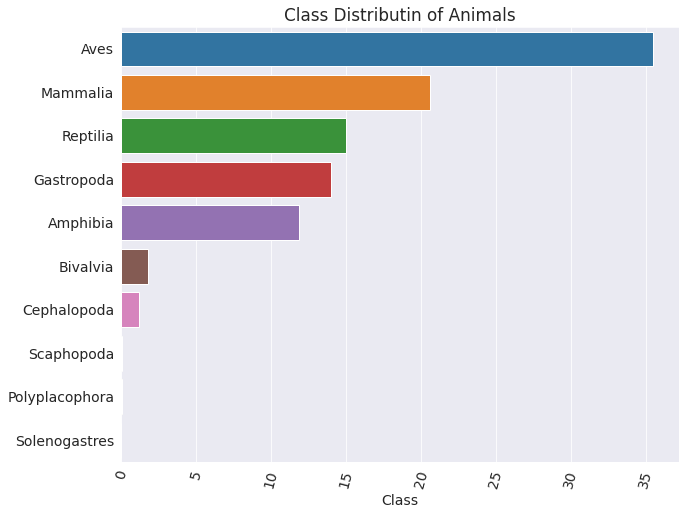

In [ ]:
sns.barplot(x = class_df, y = class_df.index)
plt.title('Class Distributin of Animals')
plt.xticks(rotation=75);

In the above code, I have plotted the various classes that the animals in the data belong to. This also shows the percentage of animals in the class as compared to total number of animals.

In the cells below, I have plotted the information about characterstics of animals like the speed, length, weight etc. They show the data about the fastest, longest animals with the numerical values of those attributes. I have also plotted the distribution of animals among phyllums.

Now we take the Name of the animal and their top speed in another dataframe. We sort the dataframe based on decreasing order of their top speed. We only take the 15 animals with highest top speed.

In [ ]:
fastest_animals = animals_df['Top speed'].sort_values(ascending=False)
fastest_animals = fastest_animals.head(15)
fastest_animals

Name
Peregrine Falcon           389.0
Saker Falcon               322.0
Gyrfalcon                  209.0
Red Kite                   183.0
Mexican Free-Tailed Bat    161.0
Crowned Eagle              161.0
Ferruginous Hawk           160.0
Lanner Falcon              144.0
Whooper Swan               140.0
Tundra Swan                135.0
Trumpeter Swan             135.0
Golden Eagle               128.0
Osprey                     128.0
Wandering Albatross        127.0
Common Loon                120.0
Name: Top speed, dtype: float64

Now we plot the animals in a barplot with their name and top speed using the new dataframe.

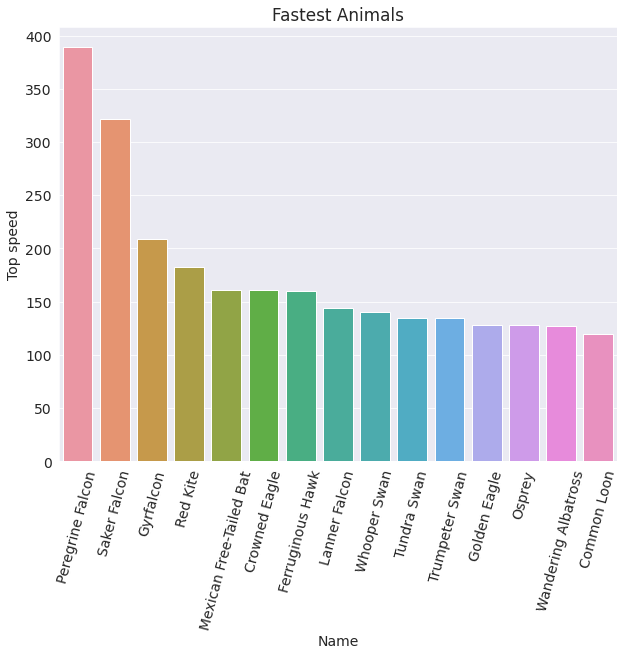

In [ ]:
sns.barplot(x = fastest_animals.index, y = fastest_animals)
plt.title('Fastest Animals')
plt.xticks(rotation=75);

Now we take the Name of the animal and their length in another dataframe. We sort the dataframe based on decreasing order of their length. We only take the 15 longest animals.

In [ ]:
longest_animals = animals_df['Length'].sort_values(ascending=False)
longest_animals = longest_animals.head(15)
longest_animals

Name
Domestic Yak             3250.000000
Alpaca                   1725.000000
Deinagkistrodon          1545.000000
Corallus grenadensis     1202.500000
Grey Rhebok              1200.000000
Sulawesi palm civet      1192.500000
Western brush wallaby    1180.000000
Goitered Gazelle         1100.000000
Pyrenean Chamois         1100.000000
American Black Bear      1066.666667
Gray brocket              950.000000
Common Wombat             900.000000
Oriental darter           885.000000
Yellow-billed loon        879.000000
Wedge-capped capuchin     862.500000
Name: Length, dtype: float64

Now we plot the animals in a barplot with their name and length using the new dataframe.

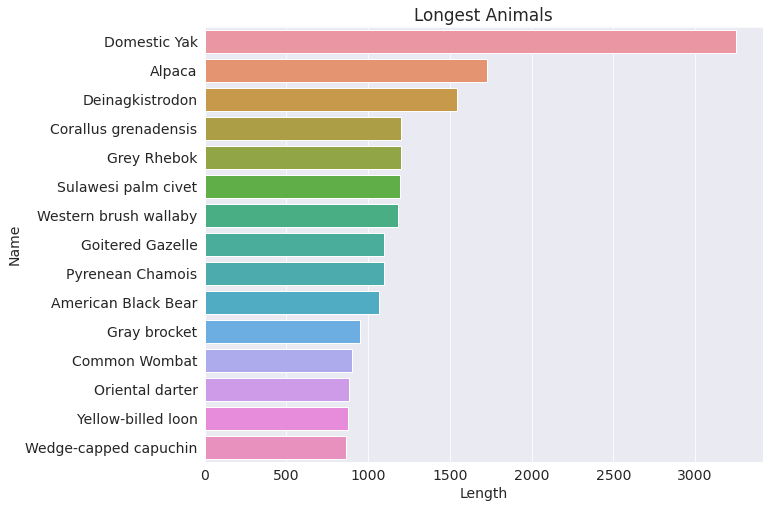

In [ ]:
sns.barplot(x = longest_animals, y = longest_animals.index)
plt.title('Longest Animals');

Let's plot a pie chart to show the distribution of animals based on the Phyllum they are in.

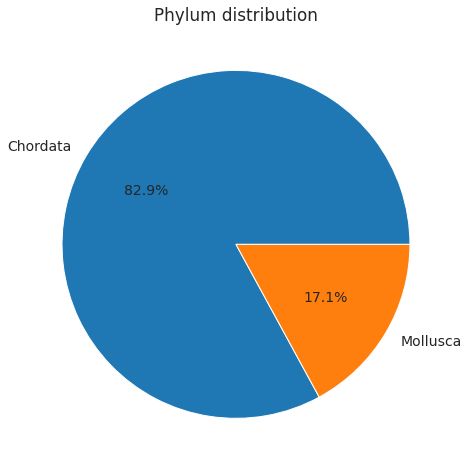

In [ ]:
phylum = animals_df.Phylum.value_counts()
plt.title('Phylum distribution')
plt.pie(phylum, labels=phylum.index, autopct='%.1f%%');

Let's save our work.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shourya242/wild-animals-characterstics-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shourya242/wild-animals-characterstics-analysis


'https://jovian.com/shourya242/wild-animals-characterstics-analysis'

Let's have a brief view at the columns with numerical data.

In [ ]:
animals_df.describe()

,Life span,Top speed,Weight,Height,Length
count,1837.000000,581.000000,2844.000000,323.000000,2924.000000
mean,18.436536,47.759897,271.524818,71.924923,98.438697
std,15.823554,33.318235,3246.501702,66.333268,152.850199
min,1.000000,2.500000,0.000000,1.000000,1.000000
25%,8.500000,28.000000,8.000000,34.000000,19.000000
50%,15.000000,45.000000,38.500000,67.500000,50.500000
75%,22.500000,64.000000,195.875000,92.500000,112.500000
max,162.500000,389.000000,164000.000000,575.000000,3250.000000


Now we take the Name of the animal and their weight in another dataframe. We sort the dataframe based on decreasing order of their weight. We only take the 20 heaviest animals.

In [ ]:
heaviest_animals = animals_df.Weight.sort_values(ascending=False).head(20)
heaviest_animals

Name
Fraser's dolphin               164000.0
Black-striped wallaby           49500.0
Southern royal albatross         9000.0
Jabiru                           8000.0
Bobak marmot                     7300.0
Northern Bottlenose Whale        6650.0
Shepherd's beaked whale          6050.0
Gray marmot                      5375.0
Gray's beaked whale              5000.0
Short-Finned Pilot Whale         4400.0
Korean hare                      4175.0
Abyssinian ground hornbill       4000.0
Travancore flying squirrel       3969.0
Northern red-bellied cooter      3900.0
Octopus cyanea                   3400.0
Horned screamer                  3150.0
Great Cormorant                  3150.0
Northern brushtail possum        3000.0
Black stork                      3000.0
Eastern imperial eagle           3000.0
Name: Weight, dtype: float64

Now we plot the animals in a barplot with their name and weight using the new dataframe.

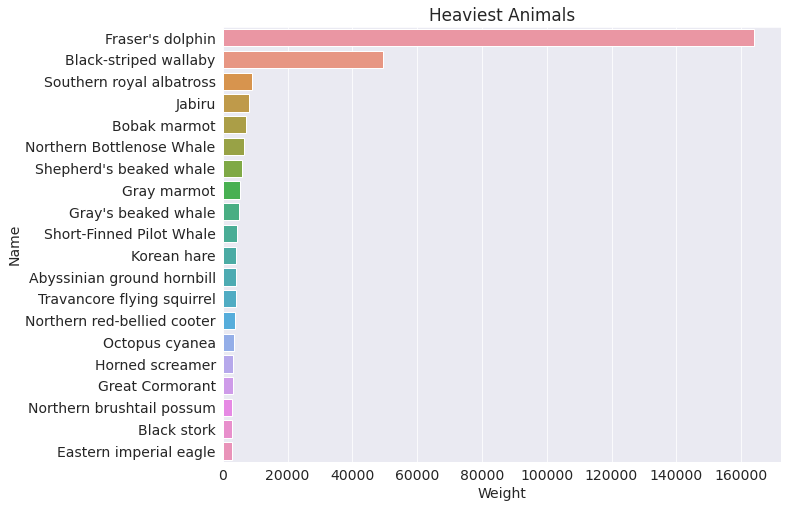

In [ ]:
sns.barplot(x = heaviest_animals, y = heaviest_animals.index)
plt.title('Heaviest Animals');

Now I define a function to split columns like attributes, dieting habits which have multiple values as data into a dataframe so that we can look at which attributes and habits are more common

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    cols = []
    for index, value in col_series[col_series.notnull()].iteritems():
        for option in value.split(','):
            if not option in result_df.columns:
                cols.append(option)
                result_df[option] = False
            result_df.at[index, option] = True
    return result_df[cols]

We apply the function on the column "Attributes" and store it into a new dataframe.

In [ ]:
attributes_df = split_multicolumn(animals_df['Attributes'])

/tmp/ipykernel_110/3245478830.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[option] = False


PREPROCESSING THE NEW DATAFRAME


Some of the columns in this new dataframe are irrelevant like "starts with". Also if an animals is migrating, it won't be in the category of "Not a Migrant". So we remove one of the columns because the other alone can serve the purpose.

In [ ]:
attributes_df.drop(['starts with'], axis=1, inplace=True)

In [ ]:
attributes_df.drop('Not a migrant', axis=1, inplace=True)

Let's have a look at the new dataframe.

In [ ]:
attributes_df

,Nocturnal,Carnivore,Scavenger,Terrestrial,Cursorial,Altricial,Pack hunters,Apex predator,Pursuit predator,Nomadic,...,Blue Animals,Detritivore,Soaring birds,Wading birds,Canada Province Birds,Chatterboxes,Waterfowl,Flightless bird,Pelagic birds,Sedentary
Name,,,,,,,,,,,,,,,,,,,,,
Grey Wolf,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Tiger,True,True,False,True,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
Brown Bear,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Blue Whale,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Killer Whale,False,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Córdoba cinclodes,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Western hemispingus,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sulphur-bearded reedhaunter,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


I take the sum of attributes row wise to see which attributes is possessed by how many animals. I sorted the sum in decreasing order.

In [ ]:
attributes_total = attributes_df.sum().sort_values(ascending=False)

In [ ]:
attributes_total

Terrestrial       21615
Social             2277
Migrating          1934
Diurnal            1665
Carnivore          1495
                  ...  
Hypercarnivore        2
Strange               1
Bright                1
Cute                  1
Sedentary             1
Length: 137, dtype: int64

Since there are a total of 137 attributes, i store only attributes that are possessed by more than 300 animals to make it feasible to plot the attributes.

In [ ]:
attributes_total = attributes_total[attributes_total > 300]
attributes_total

Terrestrial            21615
Social                  2277
Migrating               1934
Diurnal                 1665
Carnivore               1495
Nocturnal               1271
Congregatory            1225
Solitary                1140
Herbivore               1113
Arboreal                1077
Territorial              959
Monogamy                 914
Altricial                842
Insectivores             730
Polygyny                 696
Precocial                689
Zoochory                 597
Omnivore                 594
Folivore                 528
Partial Migrant          512
Frugivore                443
Polygamy                 415
Crepuscular              404
Polygynandry             395
Nomadic                  380
Oviparous                367
Dominance hierarchy      357
Burrowing                338
Flocking                 338
Granivore                332
Natatorial               316
Piscivores               315
Colonial                 312
dtype: int64

I convert the data into percentages based on number of animals that possess that attributes divided by the total number of animals.

In [ ]:
animals_type = attributes_total * 100 / attributes_total.sum()

Now we plot this data into a barplot.

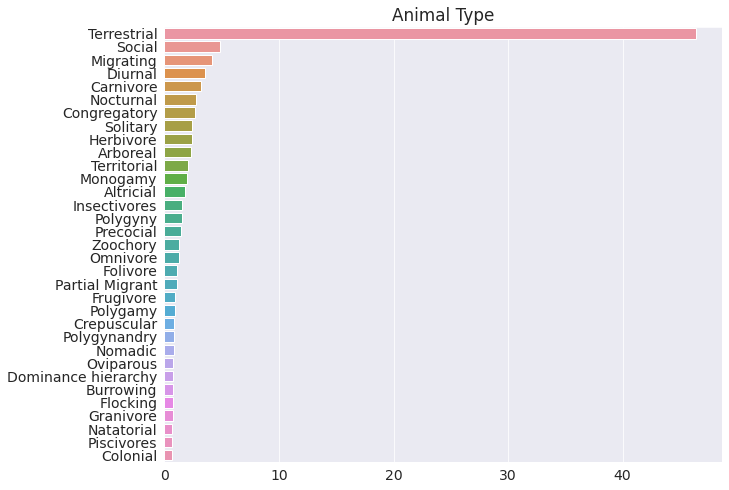

In [ ]:
sns.barplot(y = animals_type.index, x = animals_type)
plt.title('Animal Type')
plt.xlabel = "Percentage";

Now I define another function to split columns which is similar to the original function but has a different splitting point to make it suitable for other columns.

In [ ]:
def new_split_multicolumn(col_series):
    result_df = col_series.to_frame()
    cols = []
    for index, value in col_series[col_series.notnull()].iteritems():
        for option in value.split(',,'):
            if not option in result_df.columns:
                cols.append(option)
                result_df[option] = False
            result_df.at[index, option] = True
    return result_df[cols]

Applying this new function on the column "Diet"

In [ ]:
diet_df = new_split_multicolumn(animals_df.Diet)

Let's have a look at our new dataframe.

In [ ]:
diet_df

,Carnivore,Scavenger,Omnivore,Piscivores,Herbivore,Folivore,Hypercarnivore,"Carnivore,",Frugivore,Lignivore,...,"Piscivores,","Molluscivore,",Wildcat,"Scavenger,","Vermivorous,","Nectarivore,","Sanguivore,",Algivore,Detritivore,"Planktivore,"
Name,,,,,,,,,,,,,,,,,,,,,
Grey Wolf,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Tiger,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Brown Bear,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Blue Whale,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Killer Whale,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Córdoba cinclodes,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Western hemispingus,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sulphur-bearded reedhaunter,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


I take the sum of diet type row wise to see how many animals have which food habits. I sorted the sum in decreasing order.

In [ ]:
diet_types_total = diet_df.sum().sort_values(ascending=False)
diet_types_total

Carnivore                1246
Herbivore                 888
Insectivores              532
Omnivore                  423
Folivore                  422
Frugivore                 353
Piscivores                281
Granivore                 267
Molluscivore              133
Graminivore               112
Scavenger                 110
Omnivore,                  89
Vermivorous                62
Lignivore                  61
Nectarivore                52
Carnivore,                 45
Planktivore                40
Insectivores,              40
Coprophage                 23
Detritivore                22
Algivore                   18
Herbivore,                 18
Molluscivore,              10
Scavenger,                  9
Frugivore,                  9
Mycophage                   8
Myrmecophagous              7
Folivore,                   7
Palynivore                  6
Piscivores,                 6
Granivore,                  4
Nectarivore,                4
Gumivorous                  4
Lignivore,

Since there are a lot of types of food habits, I only consider the 10 most famous types of food habits.

In [ ]:
diet_types_total = diet_types_total.head(10)
diet_types_total

Carnivore       1246
Herbivore        888
Insectivores     532
Omnivore         423
Folivore         422
Frugivore        353
Piscivores       281
Granivore        267
Molluscivore     133
Graminivore      112
dtype: int64

Now I plot the food habit vs the number of animals which follow it as a barplot.

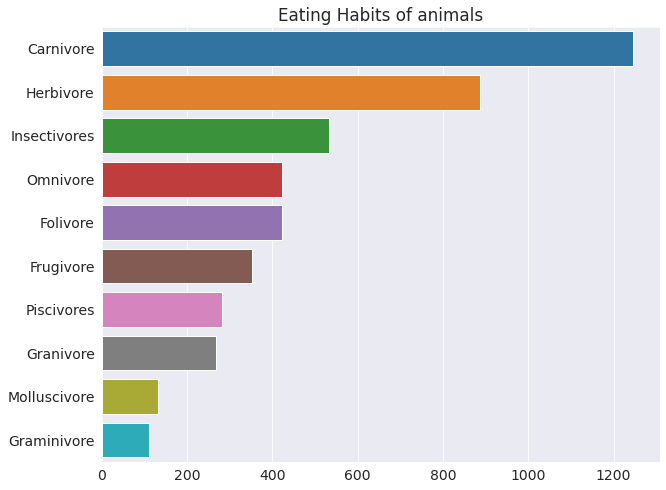

In [ ]:
sns.barplot(x = diet_types_total, y = diet_types_total.index)
plt.title('Eating Habits of animals');

I also plot the same data as a pie-chart to see the percentage share of each eating habit

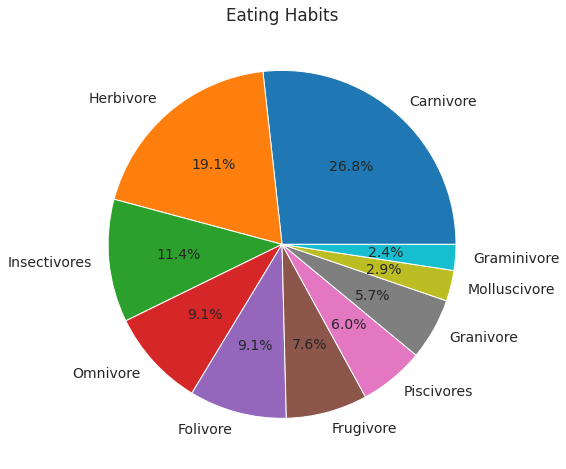

In [ ]:
plt.title('Eating Habits')
plt.pie(diet_types_total, labels=diet_types_total.index, autopct='%.1f%%');

Now let's have another look at the dataset to see more columns to explore.

In [ ]:
animals_df

,Phylum,Class,Order,Family,Genus,Life span,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
Name,,,,,,,,,,,,,,,,
Grey Wolf,Chordata,Mammalia,Carnivora,Canidae,Canis,15.0,75.0,38.0,82.5,132.50,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
Tiger,Chordata,Mammalia,Carnivora,Felidae,Panthera,12.5,96.0,185.5,NaN,295.00,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
Brown Bear,Chordata,Mammalia,Carnivora,Ursidae,Ursus,35.0,56.0,367.5,111.5,3.75,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
Blue Whale,Chordata,Mammalia,Artiodactyla,Balaenopteridae,Balaenoptera,85.0,20.0,130.0,NaN,27.50,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
Killer Whale,Chordata,Mammalia,Artiodactyla,Delphinidae,Orcinus,65.0,45.0,4.5,NaN,7.50,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Córdoba cinclodes,Chordata,Aves,Passeriformes,Furnariidae,Cinclodes,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Decreasing', 'Population..."
Western hemispingus,Chordata,Aves,Passeriformes,Thraupidae,Sphenopsis,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Stable', 'Population sta..."
Sulphur-bearded reedhaunter,Chordata,Aves,Passeriformes,Furnariidae,Cranioleuca,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Decreasing', 'Population..."


Let's apply the function to split column values to the column Population

In [ ]:
population_type = split_multicolumn(animals_df.Population)
population_type

,{'Population trend': 'Stable','Population status': 'Least concern (LC)'},{'Population trend': 'Decreasing','Population status': 'Endangered (EN)'},{'Population trend': 'Increasing',{'Population status': 'Data deficient (DD)'},'Population status': 'Vulnerable (VU)'},'Population status': 'Near Threatened (NT)'},{'Population status': 'Vulnerable (VU)'},{'Population status': 'Near Threatened (NT)'},...,'Population status': 'Critically endangered (CR)'},'Population status': 'Data deficient (DD)'},{'Population status': 'Extinct in the wild (EW)'},{'Population status': 'Extinct (EX)'},{'Population status': 'Endangered (EN)'},{'Population status': 'Critically endangered (CR)'},{'Population trend': 'Unknown',{'Population trend': 'Decreasing'},'Population status': 'Extinct (EX)'},'Population status': 'Extinct in the wild (EW)'}
Name,,,,,,,,,,,,,,,,,,,,,
Grey Wolf,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Tiger,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Brown Bear,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Blue Whale,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Killer Whale,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Córdoba cinclodes,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Western hemispingus,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sulphur-bearded reedhaunter,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now I find the number of animals whose population come under a certain status. I also sort the number of animals in decreasing order.

In [ ]:
population_status = population_type.sum().sort_values(ascending=False)
population_status

 'Population status': 'Least concern (LC)'}            14621
{'Population trend': 'Decreasing'                       8378
{'Population trend': 'Stable'                           7350
{'Population trend': 'Unknown'                          5813
{}                                                      5350
 'Population status': 'Vulnerable (VU)'}                1804
 'Population status': 'Data deficient (DD)'}            1802
 'Population status': 'Endangered (EN)'}                1620
 'Population status': 'Near Threatened (NT)'}           1589
 'Population status': 'Critically endangered (CR)'}      877
{'Population trend': 'Increasing'                        782
{'Population status': 'Least concern (LC)'}              274
{'Population status': 'Extinct (EX)'}                    160
{'Population status': 'Data deficient (DD)'}             102
{'Population status': 'Vulnerable (VU)'}                  73
{'Population status': 'Near Threatened (NT)'}             61
{'Population status': 'E

Now I plot this data as a barplot.

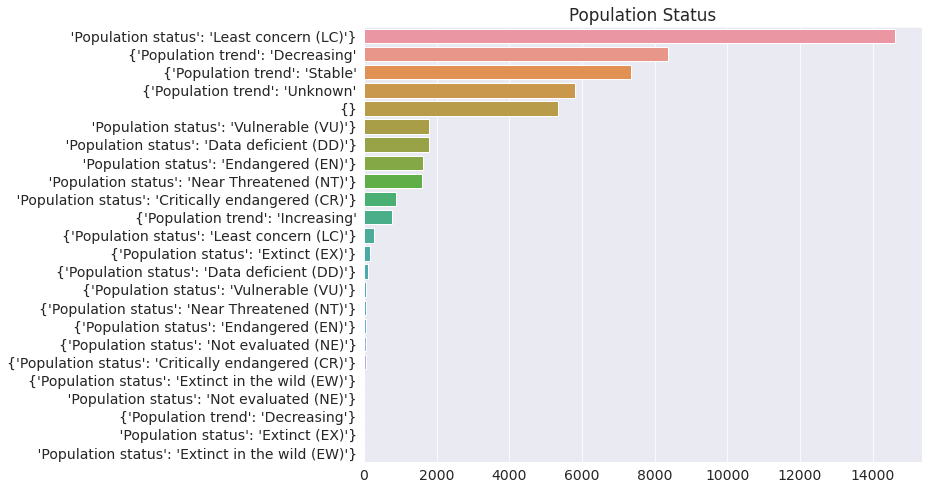

In [ ]:
plt.title('Population Status')
sns.barplot(x = population_status, y = population_status.index)
plt.xlabel = 'No. of Species';

I tried using the split_column function on "Mating Habits" but the values in the column are separated by different symbols due to which it was not possible to split it and use the data. Due to this I dropped the column.

In [ ]:
animals_df.drop('Mating_Habits', axis=1, inplace=True)

Looking at the updated dataframe.

In [ ]:
animals_df

,Phylum,Class,Order,Family,Genus,Life span,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Population
Name,,,,,,,,,,,,,,,
Grey Wolf,Chordata,Mammalia,Carnivora,Canidae,Canis,15.0,75.0,38.0,82.5,132.50,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Population trend': 'Stable', 'Population sta..."
Tiger,Chordata,Mammalia,Carnivora,Felidae,Panthera,12.5,96.0,185.5,NaN,295.00,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Population trend': 'Decreasing', 'Population..."
Brown Bear,Chordata,Mammalia,Carnivora,Ursidae,Ursus,35.0,56.0,367.5,111.5,3.75,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Population trend': 'Stable', 'Population sta..."
Blue Whale,Chordata,Mammalia,Artiodactyla,Balaenopteridae,Balaenoptera,85.0,20.0,130.0,NaN,27.50,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Population trend': 'Increasing', 'Population..."
Killer Whale,Chordata,Mammalia,Artiodactyla,Delphinidae,Orcinus,65.0,45.0,4.5,NaN,7.50,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,{'Population status': 'Data deficient (DD)'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Córdoba cinclodes,Chordata,Aves,Passeriformes,Furnariidae,Cinclodes,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,"{'Population trend': 'Decreasing', 'Population..."
Western hemispingus,Chordata,Aves,Passeriformes,Thraupidae,Sphenopsis,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,"{'Population trend': 'Stable', 'Population sta..."
Sulphur-bearded reedhaunter,Chordata,Aves,Passeriformes,Furnariidae,Cranioleuca,NaN,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,"{'Population trend': 'Decreasing', 'Population..."


This is the end of Exploratory Analysis and Visualisation of data. I save my work and in the next section we look at question and answer them using various libraries.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shourya242/wild-animals-characterstics-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/shourya242/wild-animals-characterstics-analysis


'https://jovian.com/shourya242/wild-animals-characterstics-analysis'

# Asking and Answering Questions

I ask some questions about the dataset to find out more about the dataset to find relation among various attributes of the dataset. Let's try to find something interesting.

# Question 1 : Is there a relation between the speed and weight of the animals?

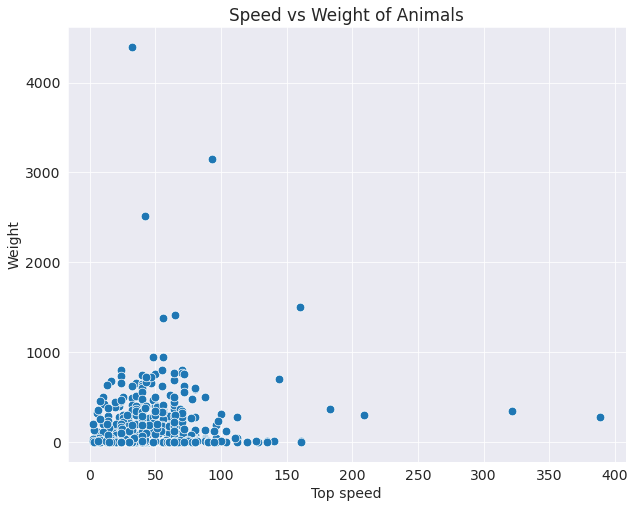

In [ ]:
plt.title("Speed vs Weight of Animals")
sns.scatterplot(x = "Top speed",
               y = "Weight",
               s = 75,
               data = animals_df);

- Here we see that data for most of the animals is accumulated towards the bottom left of the graph
- If we look at the top left and bottom right, we see that the fastest animals have low weight and heavy animals have low top speeds.

# Question 2 : How do numerical attributes of animals vary across class of animals?

I group the dataframe based on the values in the column Class.

In [ ]:
grouped_data = animals_df.groupby('Class')

Now I take the columns with numerical values from the grouped data and store that it as a separate dataframe.

In [ ]:
values = grouped_data[["Life span", "Top speed", "Weight", "Height", "Length"]].mean()
values

,Life span,Top speed,Weight,Height,Length
Class,,,,,
Amphibia,4.000000,NaN,145.388889,NaN,56.112222
Aves,17.439947,64.755000,235.617630,70.191176,52.621611
Bivalvia,NaN,NaN,46.500000,NaN,20.466667
Cephalopoda,NaN,NaN,334.392857,NaN,65.894737
Gastropoda,NaN,NaN,21.500000,NaN,33.600000
Mammalia,17.202549,41.333333,301.755150,72.807312,135.065930
Polyplacophora,NaN,NaN,NaN,NaN,NaN
Reptilia,24.704225,21.531250,199.402191,19.250000,68.448668
Scaphopoda,NaN,NaN,NaN,NaN,NaN


I will drop the rows which have the value NA for all the columns

In [ ]:
values = values.dropna(how='all')

In [ ]:
values

,Life span,Top speed,Weight,Height,Length
Class,,,,,
Amphibia,4.000000,NaN,145.388889,NaN,56.112222
Aves,17.439947,64.755000,235.617630,70.191176,52.621611
Bivalvia,NaN,NaN,46.500000,NaN,20.466667
Cephalopoda,NaN,NaN,334.392857,NaN,65.894737
Gastropoda,NaN,NaN,21.500000,NaN,33.600000
Mammalia,17.202549,41.333333,301.755150,72.807312,135.065930
Reptilia,24.704225,21.531250,199.402191,19.250000,68.448668


- Now we can use this data to see which class of animals is the heaviest or the tallest or the fastest. Similar work can be done to compare across pyllums, genuses etc.

# Question 3 : Is any relation between the various attributes of the data with numerical values?

Let's take the columns from the original dataframe that has numerical values.

In [ ]:
num_attributes = animals_df[["Top speed", "Weight", "Height", "Length"]]

Now I calculate the value of correlation coefficient of all the rows columns of the dataframe with one another.

In [ ]:
cor_values = num_attributes.corr()

In [ ]:
cor_values

,Top speed,Weight,Height,Length
Top speed,1.000000,0.070813,0.030539,0.056195
Weight,0.070813,1.000000,0.067869,0.048185
Height,0.030539,0.067869,1.000000,0.134309
Length,0.056195,0.048185,0.134309,1.000000


- Since none of the values of correlation are more than 0.13, we see that the correlation values between the columns are too low and hence there is no relation between their mathematical values.

# Q4 : How do eating habits of animals vary acorss different orders

For this question, we start by merging the original dataframe with the diet dataframe by the column Name

In [ ]:
diet_merged = pd.merge(animals_df, diet_df, on='Name')

In [ ]:
diet_merged

,Phylum,Class,Order,Family,Genus,Life span,Top speed,Weight,Height,Length,...,"Piscivores,","Molluscivore,",Wildcat,"Scavenger,","Vermivorous,","Nectarivore,","Sanguivore,",Algivore,Detritivore,"Planktivore,"
Name,,,,,,,,,,,,,,,,,,,,,
Grey Wolf,Chordata,Mammalia,Carnivora,Canidae,Canis,15.0,75.0,38.0,82.5,132.50,...,False,False,False,False,False,False,False,False,False,False
Tiger,Chordata,Mammalia,Carnivora,Felidae,Panthera,12.5,96.0,185.5,NaN,295.00,...,False,False,False,False,False,False,False,False,False,False
Brown Bear,Chordata,Mammalia,Carnivora,Ursidae,Ursus,35.0,56.0,367.5,111.5,3.75,...,False,False,False,False,False,False,False,False,False,False
Blue Whale,Chordata,Mammalia,Artiodactyla,Balaenopteridae,Balaenoptera,85.0,20.0,130.0,NaN,27.50,...,False,False,False,False,False,False,False,False,False,False
Killer Whale,Chordata,Mammalia,Artiodactyla,Delphinidae,Orcinus,65.0,45.0,4.5,NaN,7.50,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Córdoba cinclodes,Chordata,Aves,Passeriformes,Furnariidae,Cinclodes,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
Western hemispingus,Chordata,Aves,Passeriformes,Thraupidae,Sphenopsis,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
Sulphur-bearded reedhaunter,Chordata,Aves,Passeriformes,Furnariidae,Cranioleuca,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


Now we group this new dataframe by the column Order for analysis.

In [ ]:
grouped_order = diet_merged.groupby('Order')

I take the columns of the most common eating habits from the grouped dataframe and find the number of Oders which have this kind of eating habits.

In [ ]:
diet_type = grouped_order[["Carnivore", "Scavenger", "Omnivore", "Piscivores", "Herbivore", "Frugivore"]].sum()
diet_type

,Carnivore,Scavenger,Omnivore,Piscivores,Herbivore,Frugivore
Order,,,,,,
Accipitriformes,61,26,0,5,0,0
Adapedonta,0,0,0,0,0,0
Aegotheliformes,0,0,0,0,0,0
Afrosoricida,4,0,3,1,0,0
Anomalodesmata,0,0,0,0,0,0
...,...,...,...,...,...,...
Trogoniformes,0,0,0,0,2,2
Tubulidentata,1,0,0,0,0,0
Unionoida,0,0,0,0,4,0


Let's take the column which has the maximum value for a particular row to find which eating habit is most famours with which Order.

In [ ]:
fav_diet = diet_type.idxmax(axis=1)
fav_diet

Order
Accipitriformes    Carnivore
Adapedonta         Carnivore
Aegotheliformes    Carnivore
Afrosoricida       Carnivore
Anomalodesmata     Carnivore
                     ...    
Trogoniformes      Herbivore
Tubulidentata      Carnivore
Unionoida          Herbivore
Vampyromorphida    Carnivore
Venerida           Carnivore
Length: 118, dtype: object

- Now we can see animals of which Order favour which type of diet.

# Q5 : Animals of which class have which characterstic attributes?

For this question, we start by merging the original dataframe with the attributes dataframe by the column Name.

In [ ]:
characterstic = pd.merge(animals_df, attributes_df, on='Name')

In [ ]:
characterstic

,Phylum,Class,Order,Family,Genus,Life span,Top speed,Weight,Height,Length,...,Blue Animals,Detritivore,Soaring birds,Wading birds,Canada Province Birds,Chatterboxes,Waterfowl,Flightless bird,Pelagic birds,Sedentary
Name,,,,,,,,,,,,,,,,,,,,,
Grey Wolf,Chordata,Mammalia,Carnivora,Canidae,Canis,15.0,75.0,38.0,82.5,132.50,...,False,False,False,False,False,False,False,False,False,False
Tiger,Chordata,Mammalia,Carnivora,Felidae,Panthera,12.5,96.0,185.5,NaN,295.00,...,False,False,False,False,False,False,False,False,False,False
Brown Bear,Chordata,Mammalia,Carnivora,Ursidae,Ursus,35.0,56.0,367.5,111.5,3.75,...,False,False,False,False,False,False,False,False,False,False
Blue Whale,Chordata,Mammalia,Artiodactyla,Balaenopteridae,Balaenoptera,85.0,20.0,130.0,NaN,27.50,...,False,False,False,False,False,False,False,False,False,False
Killer Whale,Chordata,Mammalia,Artiodactyla,Delphinidae,Orcinus,65.0,45.0,4.5,NaN,7.50,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Córdoba cinclodes,Chordata,Aves,Passeriformes,Furnariidae,Cinclodes,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
Western hemispingus,Chordata,Aves,Passeriformes,Thraupidae,Sphenopsis,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
Sulphur-bearded reedhaunter,Chordata,Aves,Passeriformes,Furnariidae,Cranioleuca,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


Now we group this new dataframe by the column Class for analysis.

In [ ]:
grouped_character = characterstic.groupby('Class')

I take the columns of the most interesting and common attributes from the grouped dataframe and find the number of classes which have these attributes.

In [ ]:
character_by_class = grouped_character[["Nocturnal", "Terrestrial", "Nomadic", "Diurnal", "Migrating", "Social"]].sum(())

In [ ]:
character_by_class

,Nocturnal,Terrestrial,Nomadic,Diurnal,Migrating,Social
Class,,,,,,
Amphibia,52,3286,0,21,9,31
Aves,89,9643,248,746,1746,1219
Bivalvia,0,0,0,0,0,47
Cephalopoda,9,0,0,5,14,11
Gastropoda,7,62,0,0,0,3
Mammalia,932,5500,126,635,145,903
Polyplacophora,0,0,0,0,0,0
Reptilia,182,3124,6,258,20,63
Scaphopoda,0,0,0,0,0,0


Let's take the column which has the maximum value for a particular row to find which attribute is most useful and common for survival of that Class.

In [ ]:
useful_characters = character_by_class.idxmax(axis=1)
useful_characters

Class
Amphibia          Terrestrial
Aves              Terrestrial
Bivalvia               Social
Cephalopoda         Migrating
Gastropoda        Terrestrial
Mammalia          Terrestrial
Polyplacophora      Nocturnal
Reptilia          Terrestrial
Scaphopoda          Nocturnal
Solenogastres       Nocturnal
dtype: object

Hence we find animals of which Class have which attributes the most which help them increase their chances of survival

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>